Bharath Gunasekaran
CMPE-258 Assignment 1 Part 1

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 15.4MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 55.5MB/s 
     |████████████████████████████████| 194kB 58.6MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# CNN Learn
CNN Learn is used for image recogniztion. In the code sample below will tell you if a picture contains a dog or cat. If it a dog it will return true else false. 

We are using the pet dataset and we are able to convert that data to the format we need by using ImageDataLoader. 

We need to pass 3 key parameters to the model the data, architecture, and metric to evaluate the quality of our predicition against our validation set. 

In [ ]:
from fastai.vision.all import *
data_path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
pet_images = ImageDataLoaders.from_name_func(
    data_path, get_image_files(data_path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

dog_cat_classifier = cnn_learner(pet_images, resnet34, metrics=error_rate)
dog_cat_classifier.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.142668,0.014068,0.005413,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.060794,0.007383,0.002706,00:55


Upload Dog or Cat picture to test

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_dog,_,probs = dog_cat_classifier.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999982


# Unet Learning
The code sample below we are using the CAMVID dataset. This model will allow you to identify objects in an image. I tried to use a COCO dataset but I was having issues creating the trarget images from the image boxes. Since image segmentaiton requires the labels to be color coded images. 

In [ ]:
data_path = untar_data(URLs.CAMVID_TINY)
camvid_images = SegmentationDataLoaders.from_label_func(
    data_path, bs=8, fnames = get_image_files(data_path/"images"),
    label_func = lambda o: data_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(data_path/'codes.txt', dtype=str)
)

image_model = unet_learner(camvid_images, resnet34)
image_model.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.698445,2.112543,00:01


epoch,train_loss,valid_loss,time
0,1.779615,1.499033,00:01
1,1.600577,1.326793,00:01
2,1.481715,1.165862,00:01
3,1.376085,1.044812,00:01
4,1.281456,0.939679,00:01
5,1.169894,0.906883,00:01
6,1.070154,0.833830,00:01
7,0.993962,0.828593,00:01


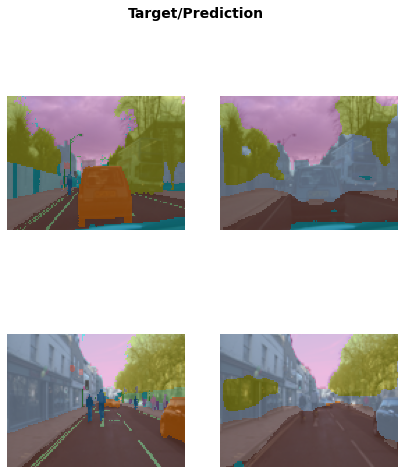

In [11]:
image_model.show_results(max_n=6, figsize=(7,8))

In [5]:
data_path = untar_data(URLs.CAMVID_TINY)
camvid_images = SegmentationDataLoaders.from_label_func(
    data_path, bs=8, fnames = get_image_files(data_path/"images"),
    label_func = lambda o: data_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(data_path/'codes.txt', dtype=str)
)

image_model = unet_learner(camvid_images, resnet50)
image_model.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.962183,2.482449,00:10


epoch,train_loss,valid_loss,time
0,1.643483,1.455008,00:10
1,1.510645,1.594954,00:10
2,1.640062,1.641969,00:10
3,1.577356,1.279127,00:10
4,1.469823,1.107559,00:10
5,1.355122,0.954308,00:10
6,1.242526,0.898507,00:10
7,1.155316,0.891508,00:10


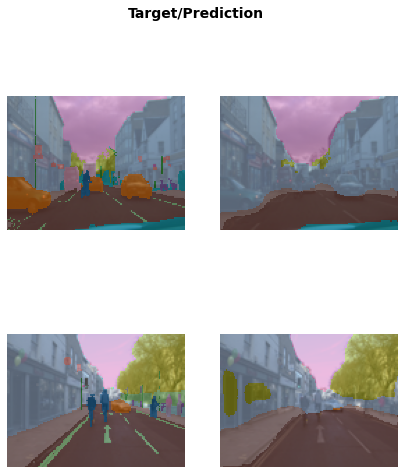

In [10]:
image_model.show_results(max_n=6, figsize=(7,8))

#Text Classifier Learner
The sample code below tries to predict how positive or negative a text provided is. The model is trained with movie ratings from IMDB. 

In [ ]:
from fastai.text.all import *

imdb_path = untar_data(URLs.IMDB)
imdb_data = TextDataLoaders.from_folder(imdb_path, valid='test', bs=16)

text_classifier = text_classifier_learner(imdb_data, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
text_classifier.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.482191,0.417498,0.806800,06:53


epoch,train_loss,valid_loss,accuracy,time
0,0.321099,0.255092,0.891560,13:04
1,0.265552,0.214840,0.911000,13:04
2,0.182255,0.182205,0.929400,13:03
3,0.138339,0.178910,0.931760,13:02


In [ ]:
learn.predict("I really liked that movie!")

### Tabular Learner
The tabular learning is used to work with structure data that is a combination of categorical and continous values. You pass column values of continous and categorical data to tabulardataloader and it will convert them to the proper format to be used by the tabular learner. 

Tabular learner can be used to do a classification on a target value or regression. 

In [ ]:
from fastai.tabular.all import *
data_path = untar_data(URLs.ADULT_SAMPLE)

adult_data = TabularDataLoaders.from_csv(data_path/'adult.csv', path=data_path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

salary_predictor = tabular_learner(adult_data, metrics=accuracy)

In [ ]:
salary_predictor.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.361191,0.365458,0.835381,00:05
1,0.349367,0.349926,0.839681,00:05
2,0.345199,0.347628,0.839988,00:04


### Collab Learner
Used to train models that are suitable for collaborative filtering. 

In [ ]:
from fastai.collab import *
data_path = untar_data(URLs.ML_SAMPLE)
rating_data = CollabDataLoaders.from_csv(data_path/'ratings.csv')
rating_predictor = collab_learner(rating_data, y_range=(0.5,5.5))
rating_predictor.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497563,1.419108,00:00


epoch,train_loss,valid_loss,time
0,1.348368,1.360463,00:00
1,1.248621,1.178440,00:00
2,1.010771,0.876555,00:00
3,0.791824,0.746206,00:00
4,0.690008,0.717330,00:00
5,0.641033,0.709639,00:00
6,0.629534,0.706519,00:00
7,0.610997,0.704522,00:00
8,0.603987,0.703974,00:00
9,0.603293,0.703902,00:00


In [ ]:
rating_predictor.show_results()

,userId,movieId,rating,rating_pred
0,44.0,72.0,5.0,3.459052
1,13.0,51.0,4.0,4.119844
2,62.0,65.0,4.0,3.665025
3,40.0,53.0,5.0,3.804961
4,19.0,16.0,4.5,4.498744
5,15.0,5.0,4.5,3.444189
6,83.0,10.0,2.0,2.451942
7,55.0,14.0,5.0,4.391811
8,63.0,26.0,3.0,2.967124
